# Worksheet 08

Name:  Sangjoon Lee
UID: U79516048

### Topics

- Singular Value Decomposition

You can download the image [here](https://github.com/gallettilance/CS506-Fall2022/raw/master/worksheets/boat.dat)

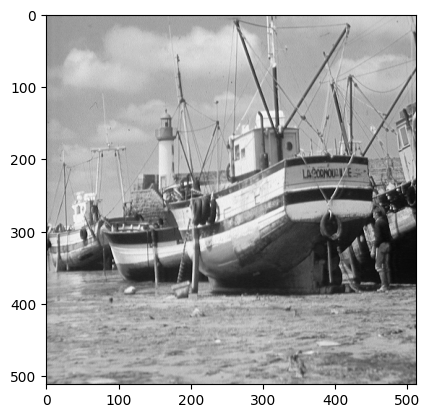

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

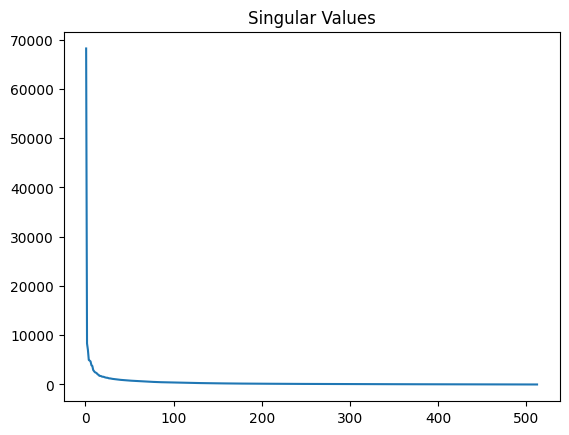

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(range(1, len(s) +1), s)
plt.title("Singular Values")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

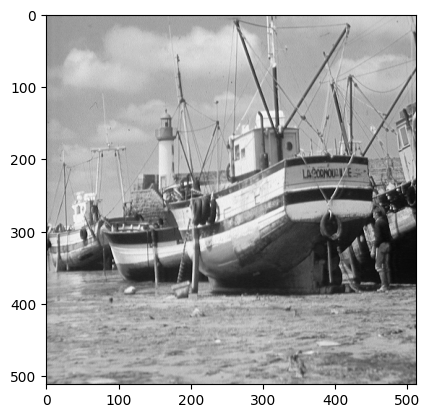

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

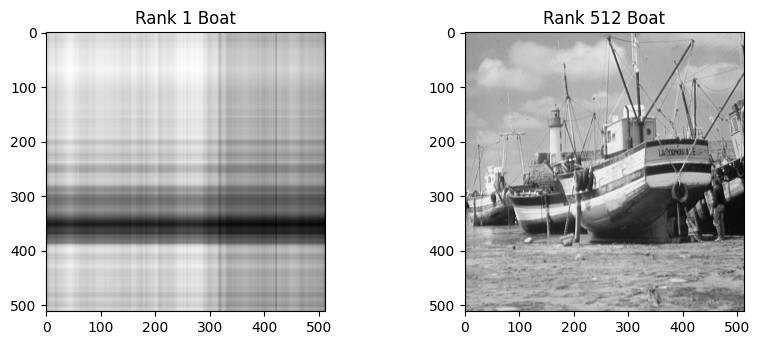

In [5]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

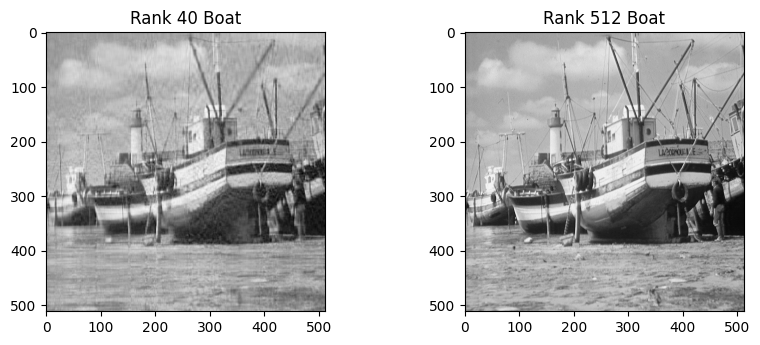

In [6]:
scopy = s.copy()
scopy[40:] = 0.0

boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

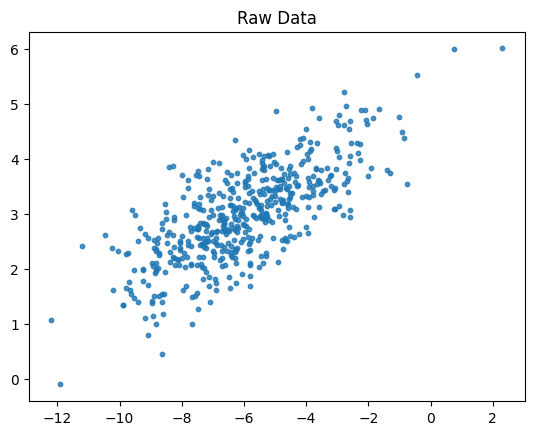

In [9]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

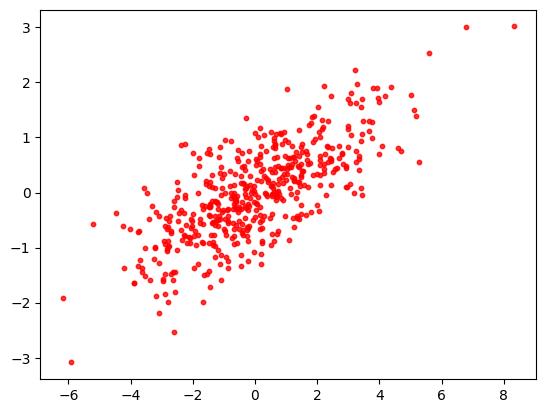

In [22]:
mean_centered = np.subtract(X, np.mean(X, axis=0))
plt.scatter(mean_centered[:, 0], mean_centered[:, 1], s=10, alpha=0.8, color='r')
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

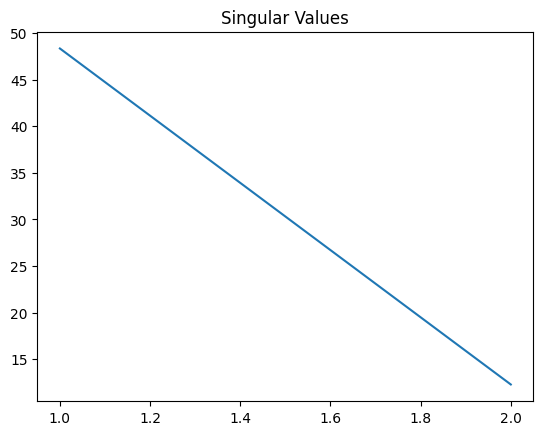

In [28]:
u, s, vt = np.linalg.svd(mean_centered,full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

2 singular values because the original matrix only has two columns, so $A^{T}A$ results in a matrix with two columns, and hence 2 singular values.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

It would be the best-fit line of the dataset because it's supposed to represent the entire dataset so it's supposed to penerate the "middle" of the dataset.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

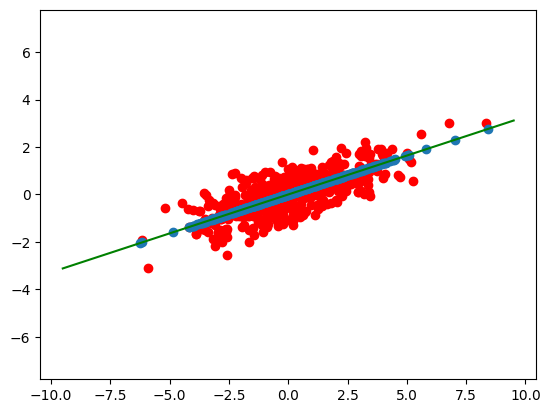

In [31]:
scopy = s.copy()
scopy[1] = 0.0
reducedX = u @ np.diag(scopy) @ vt
plt.axis('equal')
plt.scatter(mean_centered[:,0],mean_centered[:,1], color='r')
plt.scatter(reducedX[:,0], reducedX[:,1])
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
_ = plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

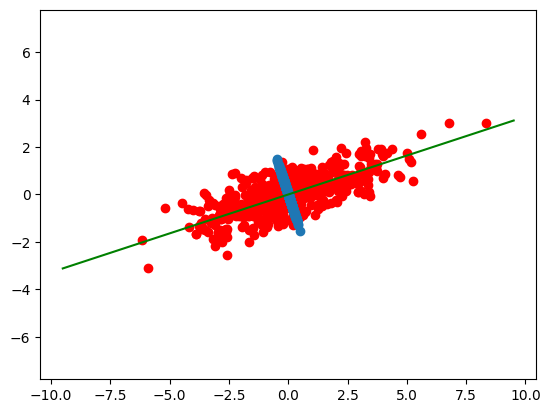

In [32]:
scopy = s.copy()
scopy[0] = 0.0
reducedX = u @ np.diag(scopy) @ vt
plt.axis('equal')
plt.scatter(mean_centered[:,0],mean_centered[:,1], color='r')
plt.scatter(reducedX[:,0], reducedX[:,1])
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
_ = plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
plt.show()

Step i) shows that all of the points parallel to the green line of the graph (endpoints), with the only difference being the X positions.
On the other hand, step ii) shows that all of the points are perpendicular to the green line of the graph, with th eonly difference being the y positions.